In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from model import Model

In [2]:
sns.set()

In [35]:
model = Model(nx.grid_graph([20, 20]))
model.generate_trajectory(0.05, 0.1, 0.3)
model.generate_gif_from_trajectory(file_name='realization.gif', nodes_indicate_position=True)

<img src='realization.gif'>

In [24]:
model = Model(nx.grid_graph([250, 250]))
model.generate_trajectory(0.05, 0.1, 0.3);

In [25]:
adopters_nodes_in_time = model.get_fraction_of_nodes_in_sate(True)

Text(0.5, 1.0, 'Adopters')

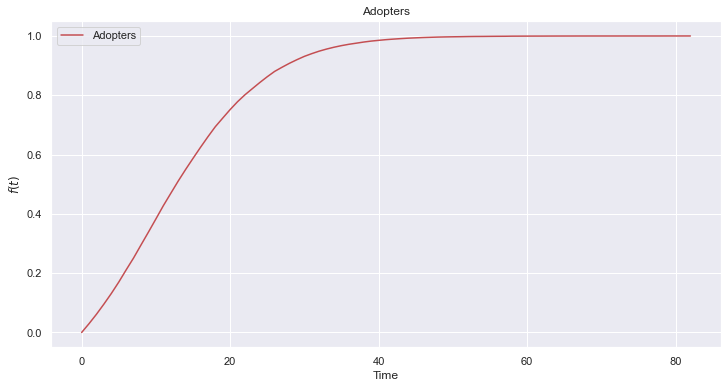

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(adopters_nodes_in_time, 'r', label='Adopters')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$f(t)$')
plt.title('Adopters')

In [30]:
def get_society_state(graph, society, state):
    return [node for node, node_vars in dict(graph.nodes(data=True)).items()
            if node_vars['state'] == state and node_vars['society'] == society]

Text(0.5, 1.0, 'New adopters')

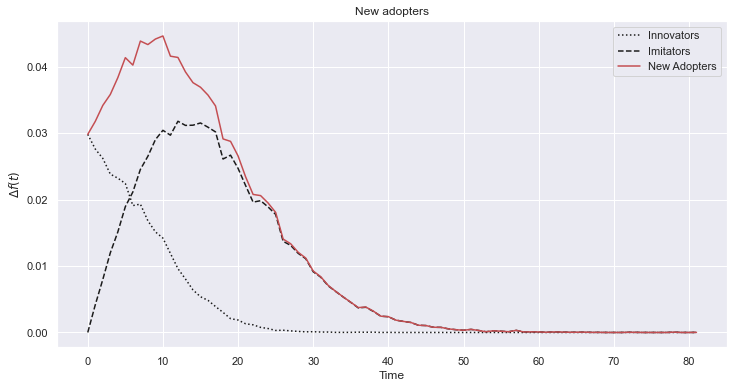

In [33]:
total_number_of_nodes = model.graph.number_of_nodes()
innovators_in_time = [len(get_society_state(current_graph, 'innovator', True)) / total_number_of_nodes
                      for current_graph in model.trajectory]
imitators_in_time = [len(get_society_state(current_graph, 'imitator', True)) / total_number_of_nodes
                     for current_graph in model.trajectory]
plt.figure(figsize=(12, 6))
plt.plot(np.diff(innovators_in_time), 'k:', label='Innovators')
plt.plot(np.diff(imitators_in_time), 'k--', label='Imitators')
plt.plot(np.diff(innovators_in_time) + np.diff(imitators_in_time), 'r', label='New Adopters')
plt.legend()
plt.xlabel('Time')
plt.ylabel(r'$\Delta f(t)$')
plt.title('New adopters')